In [1]:
# !pip install yfinance
# !pip install pandas-datareader

In [2]:
import pandas as pd
from pandas_datareader import data
# import yfinance as yf
# pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
# import os
import random

import torch
# import matplotlib as mpl
# import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd
# pd.options.mode.chained_assignment = None
# import seaborn as sns
from tqdm import tqdm

c:\Program Files\Python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# msft = yf.Ticker("MSFT")
# print(msft.info)
# print(msft.stats())

In [40]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['^GSPC', 'APPL', 'MSFT']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2000-01-01'  # '2014-01-01'  # 2012-10-21
end_date = '2022-11-22'  # '2014-10-20'  # 2022

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('GOOGL', 'yahoo', start_date, end_date)

# Resample the data to normalize it, the data comes without any data on the (days that the markets are close, weekends)
panel_data = panel_data.resample("D").max()

# Fill the data in the closed markets with the data from the previous trading day, because it is their true value
panel_data = panel_data.fillna(method="ffill")

panel_data[panel_data.index.name] = panel_data.index
panel_data.index.name = None
panel_data = panel_data[['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']]
panel_data.reset_index(drop=True, inplace=True)

panel_data.head(20)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-19,2.604104,2.401401,2.502503,2.511011,893181924.0,2.511011
1,2004-08-20,2.729730,2.515015,2.527778,2.710460,456686856.0,2.710460
2,2004-08-21,2.729730,2.515015,2.527778,2.710460,456686856.0,2.710460
3,2004-08-22,2.729730,2.515015,2.527778,2.710460,456686856.0,2.710460
4,2004-08-23,2.839840,2.728979,2.771522,2.737738,365122512.0,2.737738
5,2004-08-24,2.792793,2.591842,2.783784,2.624374,304946748.0,2.624374
6,2004-08-25,2.702703,2.599600,2.626627,2.652653,183772044.0,2.652653
7,2004-08-26,2.701451,2.619119,2.626376,2.700450,141897960.0,2.700450
8,2004-08-27,2.718218,2.644895,2.705205,2.656406,124235640.0,2.656406
9,2004-08-28,2.718218,2.644895,2.705205,2.656406,124235640.0,2.656406


In [5]:
# panel_data.drop(columns=['Volume'], axis=1, inplace=True)
# panel_data

In [6]:
# panel_data.tail(10)

In [41]:
date = pd.to_datetime(panel_data.pop('Date'), format='%Y-%m-%d')

In [8]:
# introduzir datas em falta com valores nos dias em falta

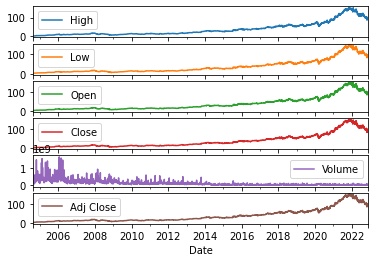

In [42]:
plot_cols = ['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']
# plot_cols = ['High', 'Low', 'Open', 'Close', 'Adj Close']
plot_features = panel_data[plot_cols]
plot_features.index = date
_ = plot_features.plot(subplots=True)

# plot_features = panel_data[plot_cols][:480]
# plot_features.index = date[:480]
# _ = plot_features.plot(subplots=True)

In [10]:
# panel_data.plot(y="High")

In [43]:
panel_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
High,6670.0,3.779209e+01,3.516808e+01,2.546046e+00,1.273774e+01,2.286011e+01,5.424550e+01,1.515465e+02
Low,6670.0,3.702673e+01,3.440541e+01,2.401401e+00,1.246115e+01,2.254304e+01,5.300450e+01,1.488990e+02
Open,6670.0,3.742670e+01,3.480085e+01,2.482232e+00,1.262844e+01,2.277327e+01,5.361150e+01,1.512500e+02
Close,6670.0,3.741410e+01,3.479417e+01,2.502753e+00,1.263670e+01,2.275225e+01,5.360037e+01,1.498385e+02
Volume,6670.0,1.261728e+08,1.546711e+08,9.312000e+06,3.368200e+07,7.236578e+07,1.540468e+08,1.643023e+09
Adj Close,6670.0,3.741410e+01,3.479417e+01,2.502753e+00,1.263670e+01,2.275225e+01,5.360037e+01,1.498385e+02


In [44]:
panel_data.drop(columns=['Volume'], axis=1, inplace=True)
panel_data

,High,Low,Open,Close,Adj Close
0,2.604104,2.401401,2.502503,2.511011,2.511011
1,2.729730,2.515015,2.527778,2.710460,2.710460
2,2.729730,2.515015,2.527778,2.710460,2.710460
3,2.729730,2.515015,2.527778,2.710460,2.710460
4,2.839840,2.728979,2.771522,2.737738,2.737738
...,...,...,...,...,...
6665,98.900002,96.370003,98.769997,97.430000,97.430000
6666,98.900002,96.370003,98.769997,97.430000,97.430000
6667,98.900002,96.370003,98.769997,97.430000,97.430000
6668,98.400002,95.360001,97.290001,95.599998,95.599998


# LSTM

In [12]:
# Remove invalid values / Outliers
# vol = panel_data['Volume']
# out_vol = (vol == 52070.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 39057.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 16682.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 14627.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 13000.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 12341.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 10000.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 3826.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 3800.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 2817.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 2500.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 2199.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 2047.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 1747.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 1577.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 1482.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 1459.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 1265.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 1221.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 1212.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 1199.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 1155.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 1141.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 1117.0)
# vol[out_vol] = 0.0

# # The above inplace edits are reflected in the DataFrame.
# # panel_data['wv (m/s)'].min()
# panel_data.describe().transpose()

In [45]:
column_indices = {name: i for i, name in enumerate(panel_data.columns)}

n = len(panel_data)
train_df = panel_data[0:int(n*0.7)]
val_df = panel_data[int(n*0.7):int(n*0.9)]
test_df = panel_data[int(n*0.9):]

num_features = panel_data.shape[1]

In [46]:
train_df['High'].mean()

18.63994205899299

In [47]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
High,4669.0,18.639942,10.626580,2.546046,11.445445,14.739990,27.148001,49.980000
Low,4669.0,18.301682,10.505524,2.401401,11.174174,14.482983,26.663500,49.568001
Open,4669.0,18.484951,10.574332,2.482232,11.325325,14.664164,26.901501,49.810501
Close,4669.0,18.468984,10.565778,2.502753,11.280781,14.589590,26.888000,49.808498
Adj Close,4669.0,18.468984,10.565778,2.502753,11.280781,14.589590,26.888000,49.808498


In [48]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std


<AxesSubplot:>

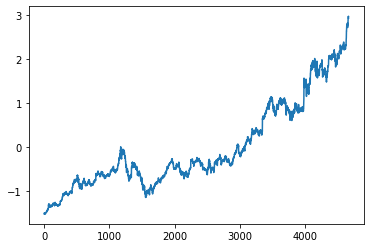

In [49]:
train_df['Close'].plot()

<AxesSubplot:>

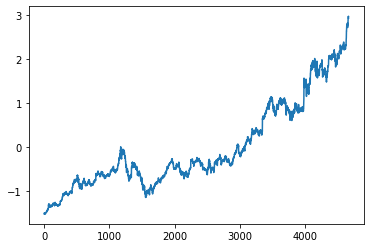

In [50]:
train_df['Close'].plot()

In [51]:
train_mean

High         18.639942
Low          18.301682
Open         18.484951
Close        18.468984
Adj Close    18.468984
dtype: float64

In [52]:
train_std

High         10.626580
Low          10.505524
Open         10.574332
Close        10.565778
Adj Close    10.565778
dtype: float64

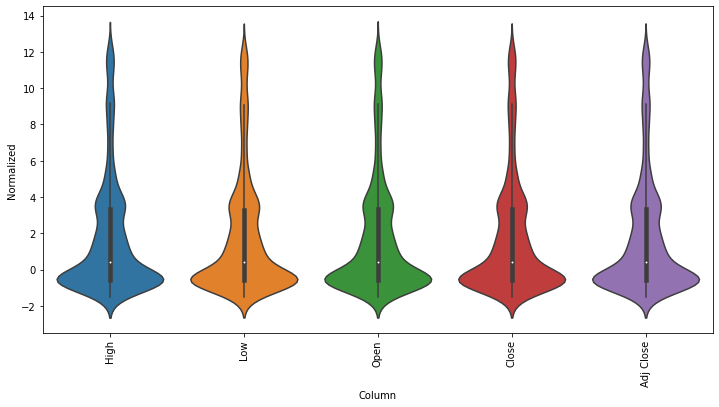

In [53]:
# Look at normalized data
df_std = (panel_data - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(panel_data.keys(), rotation=90)

## LSTM

In [54]:
class TickerData(torch.utils.data.Dataset):
    def __init__(self, df, input_width, target_width):
        ## YOUR CODE HERE ##
        data_np = np.array(df)
        self.inputs = [torch.FloatTensor(data_np[i : i + input_width]) for i in range(0, len(data_np) - input_width, input_width)]
        self.targets = [torch.FloatTensor(data_np[i : i + target_width]) for i in range(input_width, len(data_np) - target_width, input_width)]
        ## *** ##
        
    def __getitem__(self, idx):
        return {'inputs': self.inputs[idx],
                'targets': self.targets[idx]}
    
    def __len__(self):
        return min(len(self.inputs), len(self.targets))

In [55]:
# We will use the observations of the previous 24 hours to predict the temperature for the next 24 hours. (7 days)
# Thus, we will set both `input_width` and `target_width` to 24 in the instances of the dataset.

INPUT_WIDTH = 5  # 7  # 24
TARGET_WIDTH = 3  # 7  # 24

train_data = TickerData(train_df, INPUT_WIDTH, TARGET_WIDTH)
val_data = TickerData(val_df, INPUT_WIDTH, TARGET_WIDTH)
test_data = TickerData(test_df, INPUT_WIDTH, TARGET_WIDTH)

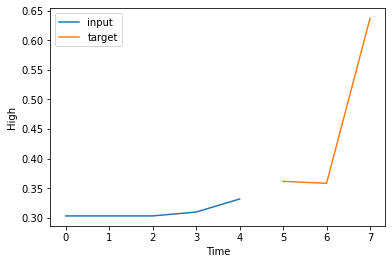

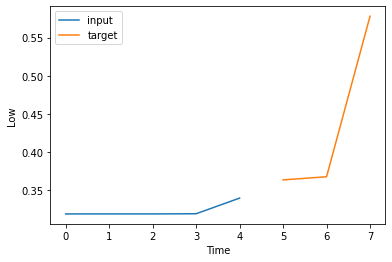

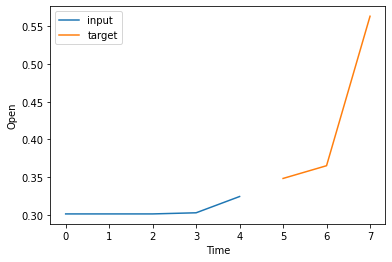

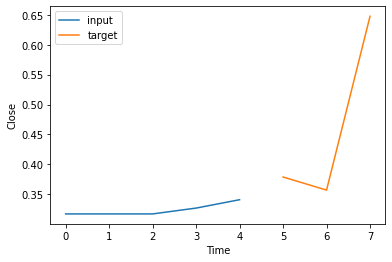

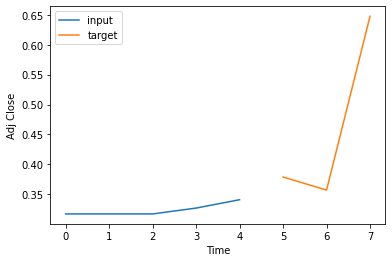

In [56]:
# Let's visualize some examples
idx = random.randint(0, len(train_data))
inputs = train_data[idx]['inputs'].numpy()
targets = train_data[idx]['targets'].numpy()

for i in range(len(train_df.columns)):
    plt.plot(range(INPUT_WIDTH), inputs[:,i], label='input')
    plt.plot(range(INPUT_WIDTH, INPUT_WIDTH + TARGET_WIDTH), targets[:,i], label='target')
    plt.ylabel(train_df.columns[i])
    plt.xlabel('Time')
    plt.legend()
    plt.show()

In [57]:
class TickerPredictor(torch.nn.Module):
    def __init__(self, num_features, hidden_size):
        super().__init__()
        self.hidden_size = hidden_size
        # instantiate a torch.nn.LSTMCell and a torch.nn.Linear layer
        ## YOUR CODE HERE ##
        self.lstm = torch.nn.LSTMCell(num_features, hidden_size)
        self.linear = torch.nn.Linear(hidden_size, num_features)
        ## *** ##
        
    def forward(self, inputs, num_steps):
        inputs = inputs.transpose(0, 1)  # batch, time, dim -> time, batch, dim
        
        # we initialize the internal states of the LSTM with zeros
        hx = torch.zeros((inputs.shape[1], self.hidden_size), device=inputs.device)
        cx = torch.zeros((inputs.shape[1], self.hidden_size), device=inputs.device)
        
        # warmup: feed the inputs through the LSTM one by one from t = 0 up to t = T-1
        ## YOUR CODE HERE ##
        for t in range(inputs.shape[0] - 1):
            hx, cx = self.lstm(inputs[t], (hx, cx))
        ## *** ##
        
        # predict num_steps into the future autoregressively
        outputs = []
        input_t = inputs[-1]
        ## YOUR CODE HERE ##
        for t in range(num_steps):
            hx, cx = self.lstm(input_t, (hx, cx))
            output_t = self.linear(hx)
            outputs.append(output_t)
            input_t = output_t
        ## *** ##
        
        # stack the list of outputs into a single tensor
        outputs = torch.stack(outputs)
        
        outputs = outputs.transpose(0, 1)  # time, batch, dim -> batch, time, dim
        return outputs
        

In [58]:
def evaluate(model, data_loader, **kwargs):
    loss_fn = kwargs.get('loss_fn', torch.nn.functional.mse_loss)
    device = kwargs.get('device', torch.device('cpu'))
    
    model.eval()
    pbar = tqdm(enumerate(data_loader), total=len(data_loader))
    avg_loss = 0.
    for i, batch in pbar:
        ## YOUR CODE HERE ##
        batch['inputs'] = batch['inputs'].to(device)
        batch['targets'] = batch['targets'].to(device)
        num_steps = batch['targets'].shape[1]
        with torch.no_grad():
            preds = model(batch['inputs'], num_steps)
        loss = loss_fn(preds, batch['targets'])
        avg_loss += loss.item()
        ## *** ##
        pbar.set_description(f'loss = {loss:.3f}')
    avg_loss /= len(data_loader)
    return avg_loss

def fit(model, train_loader, val_loader, optimizer, **kwargs):
    num_epochs = kwargs.get('num_epochs', 100)
    loss_fn = kwargs.get('loss_fn', torch.nn.functional.mse_loss)
    device = kwargs.get('device', torch.device('cpu'))
    
    train_loss_hist, val_loss_hist = [], []
    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')
        
        print('Training phase...')
        model.train()
        train_loss = 0.
        pbar = tqdm(enumerate(train_loader), total=len(train_loader))
        for i, batch in pbar:
            ## YOUR CODE HERE ##
            batch['inputs'] = batch['inputs'].to(device)
            batch['targets'] = batch['targets'].to(device)
            model.zero_grad()
            num_steps = batch['targets'].shape[1]
            preds = model(batch['inputs'], num_steps)
            loss = loss_fn(preds, batch['targets'])
            loss.backward()
            optimizer.step()
            ## *** ##
            train_loss += loss.item()
            pbar.set_description(f'loss = {loss:.3f}')
        train_loss /= len(train_loader)
        print(f'train loss = {train_loss:.3f}')
        train_loss_hist.append(train_loss)
        
        print('Validation phase...')
        val_loss = evaluate(model, val_loader, loss_fn=loss_fn, device=device)
        print(f'validation loss = {val_loss:.3f}')
        val_loss_hist.append(val_loss)
        
    return train_loss_hist, val_loss_hist
        

In [59]:
HIDDEN_SIZE = 32
LEARNING_RATE = 1e-3
NUM_EPOCHS = 100
BATCH_SIZE = 16

if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
# elif torch.backends.mps.is_available():
#     DEVICE = torch.device('mps')
else:
    DEVICE = torch.device('cpu')
print('DEVICE:', DEVICE)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=BATCH_SIZE)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE)

model = TickerPredictor(train_data[0]['inputs'].shape[1], HIDDEN_SIZE).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

DEVICE: cuda


In [60]:
train_loss, val_loss = fit(model, train_loader, val_loader, optimizer, num_epochs=NUM_EPOCHS, device=DEVICE)

Epoch 1/100
Training phase...


loss = 0.066: 100%|██████████| 59/59 [00:00<00:00, 110.06it/s]


train loss = 0.625
Validation phase...


loss = 27.440: 100%|██████████| 17/17 [00:00<00:00, 354.70it/s]


validation loss = 8.842
Epoch 2/100
Training phase...


loss = 0.042: 100%|██████████| 59/59 [00:00<00:00, 140.83it/s]


train loss = 0.083
Validation phase...


loss = 22.145: 100%|██████████| 17/17 [00:00<00:00, 246.38it/s]


validation loss = 6.198
Epoch 3/100
Training phase...


loss = 0.009: 100%|██████████| 59/59 [00:00<00:00, 152.43it/s]


train loss = 0.024
Validation phase...


loss = 18.910: 100%|██████████| 17/17 [00:00<00:00, 293.10it/s]


validation loss = 4.719
Epoch 4/100
Training phase...


loss = 0.009: 100%|██████████| 59/59 [00:00<00:00, 162.08it/s]


train loss = 0.009
Validation phase...


loss = 17.451: 100%|██████████| 17/17 [00:00<00:00, 361.64it/s]


validation loss = 4.125
Epoch 5/100
Training phase...


loss = 0.011: 100%|██████████| 59/59 [00:00<00:00, 169.97it/s]


train loss = 0.006
Validation phase...


loss = 16.361: 100%|██████████| 17/17 [00:00<00:00, 377.81it/s]


validation loss = 3.696
Epoch 6/100
Training phase...


loss = 0.005: 100%|██████████| 59/59 [00:00<00:00, 167.67it/s]


train loss = 0.004
Validation phase...


loss = 15.625: 100%|██████████| 17/17 [00:00<00:00, 395.33it/s]


validation loss = 3.410
Epoch 7/100
Training phase...


loss = 0.002: 100%|██████████| 59/59 [00:00<00:00, 172.50it/s]


train loss = 0.003
Validation phase...


loss = 14.942: 100%|██████████| 17/17 [00:00<00:00, 414.63it/s]


validation loss = 3.175
Epoch 8/100
Training phase...


loss = 0.004: 100%|██████████| 59/59 [00:00<00:00, 163.82it/s]


train loss = 0.003
Validation phase...


loss = 14.440: 100%|██████████| 17/17 [00:00<00:00, 331.85it/s]


validation loss = 2.985
Epoch 9/100
Training phase...


loss = 0.002: 100%|██████████| 59/59 [00:00<00:00, 176.40it/s]


train loss = 0.003
Validation phase...


loss = 14.044: 100%|██████████| 17/17 [00:00<00:00, 333.36it/s]


validation loss = 2.846
Epoch 10/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 175.46it/s]


train loss = 0.003
Validation phase...


loss = 13.688: 100%|██████████| 17/17 [00:00<00:00, 395.34it/s]


validation loss = 2.727
Epoch 11/100
Training phase...


loss = 0.003: 100%|██████████| 59/59 [00:00<00:00, 172.12it/s]


train loss = 0.002
Validation phase...


loss = 13.529: 100%|██████████| 17/17 [00:00<00:00, 346.81it/s]


validation loss = 2.694
Epoch 12/100
Training phase...


loss = 0.004: 100%|██████████| 59/59 [00:00<00:00, 175.20it/s]


train loss = 0.002
Validation phase...


loss = 13.229: 100%|██████████| 17/17 [00:00<00:00, 393.91it/s]


validation loss = 2.571
Epoch 13/100
Training phase...


loss = 0.013: 100%|██████████| 59/59 [00:00<00:00, 160.21it/s]


train loss = 0.002
Validation phase...


loss = 13.064: 100%|██████████| 17/17 [00:00<00:00, 347.00it/s]


validation loss = 2.520
Epoch 14/100
Training phase...


loss = 0.002: 100%|██████████| 59/59 [00:00<00:00, 165.37it/s]


train loss = 0.002
Validation phase...


loss = 12.789: 100%|██████████| 17/17 [00:00<00:00, 395.37it/s]


validation loss = 2.433
Epoch 15/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 173.05it/s]


train loss = 0.002
Validation phase...


loss = 12.698: 100%|██████████| 17/17 [00:00<00:00, 269.03it/s]


validation loss = 2.424
Epoch 16/100
Training phase...


loss = 0.000: 100%|██████████| 59/59 [00:00<00:00, 167.25it/s]


train loss = 0.002
Validation phase...


loss = 12.443: 100%|██████████| 17/17 [00:00<00:00, 361.70it/s]


validation loss = 2.324
Epoch 17/100
Training phase...


loss = 0.002: 100%|██████████| 59/59 [00:00<00:00, 173.31it/s]


train loss = 0.002
Validation phase...


loss = 12.229: 100%|██████████| 17/17 [00:00<00:00, 399.50it/s]


validation loss = 2.254
Epoch 18/100
Training phase...


loss = 0.003: 100%|██████████| 59/59 [00:00<00:00, 173.95it/s]


train loss = 0.002
Validation phase...


loss = 12.062: 100%|██████████| 17/17 [00:00<00:00, 354.17it/s]


validation loss = 2.208
Epoch 19/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 160.12it/s]


train loss = 0.002
Validation phase...


loss = 11.884: 100%|██████████| 17/17 [00:00<00:00, 435.91it/s]


validation loss = 2.153
Epoch 20/100
Training phase...


loss = 0.009: 100%|██████████| 59/59 [00:00<00:00, 183.55it/s]


train loss = 0.002
Validation phase...


loss = 11.792: 100%|██████████| 17/17 [00:00<00:00, 459.47it/s]


validation loss = 2.134
Epoch 21/100
Training phase...


loss = 0.003: 100%|██████████| 59/59 [00:00<00:00, 179.61it/s]


train loss = 0.002
Validation phase...


loss = 11.740: 100%|██████████| 17/17 [00:00<00:00, 386.39it/s]


validation loss = 2.121
Epoch 22/100
Training phase...


loss = 0.002: 100%|██████████| 59/59 [00:00<00:00, 166.66it/s]


train loss = 0.002
Validation phase...


loss = 11.582: 100%|██████████| 17/17 [00:00<00:00, 471.07it/s]


validation loss = 2.065
Epoch 23/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 161.26it/s]


train loss = 0.002
Validation phase...


loss = 11.446: 100%|██████████| 17/17 [00:00<00:00, 443.04it/s]


validation loss = 2.031
Epoch 24/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 159.31it/s]


train loss = 0.002
Validation phase...


loss = 11.416: 100%|██████████| 17/17 [00:00<00:00, 320.77it/s]


validation loss = 2.039
Epoch 25/100
Training phase...


loss = 0.005: 100%|██████████| 59/59 [00:00<00:00, 145.86it/s]


train loss = 0.002
Validation phase...


loss = 11.269: 100%|██████████| 17/17 [00:00<00:00, 354.21it/s]


validation loss = 1.992
Epoch 26/100
Training phase...


loss = 0.002: 100%|██████████| 59/59 [00:00<00:00, 154.26it/s]


train loss = 0.002
Validation phase...


loss = 11.240: 100%|██████████| 17/17 [00:00<00:00, 395.34it/s]


validation loss = 1.988
Epoch 27/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 185.35it/s]


train loss = 0.002
Validation phase...


loss = 11.166: 100%|██████████| 17/17 [00:00<00:00, 340.00it/s]


validation loss = 1.968
Epoch 28/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 178.25it/s]


train loss = 0.002
Validation phase...


loss = 11.012: 100%|██████████| 17/17 [00:00<00:00, 395.63it/s]


validation loss = 1.916
Epoch 29/100
Training phase...


loss = 0.003: 100%|██████████| 59/59 [00:00<00:00, 139.24it/s]


train loss = 0.002
Validation phase...


loss = 10.957: 100%|██████████| 17/17 [00:00<00:00, 217.96it/s]


validation loss = 1.904
Epoch 30/100
Training phase...


loss = 0.000: 100%|██████████| 59/59 [00:00<00:00, 152.23it/s]


train loss = 0.002
Validation phase...


loss = 11.027: 100%|██████████| 17/17 [00:00<00:00, 414.63it/s]


validation loss = 1.923
Epoch 31/100
Training phase...


loss = 0.002: 100%|██████████| 59/59 [00:00<00:00, 116.78it/s]


train loss = 0.002
Validation phase...


loss = 10.867: 100%|██████████| 17/17 [00:00<00:00, 223.69it/s]


validation loss = 1.881
Epoch 32/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 109.86it/s]


train loss = 0.002
Validation phase...


loss = 10.802: 100%|██████████| 17/17 [00:00<00:00, 246.37it/s]


validation loss = 1.866
Epoch 33/100
Training phase...


loss = 0.000: 100%|██████████| 59/59 [00:00<00:00, 140.46it/s]


train loss = 0.002
Validation phase...


loss = 10.614: 100%|██████████| 17/17 [00:00<00:00, 265.62it/s]


validation loss = 1.805
Epoch 34/100
Training phase...


loss = 0.002: 100%|██████████| 59/59 [00:00<00:00, 130.53it/s]


train loss = 0.002
Validation phase...


loss = 10.519: 100%|██████████| 17/17 [00:00<00:00, 253.72it/s]


validation loss = 1.776
Epoch 35/100
Training phase...


loss = 0.008: 100%|██████████| 59/59 [00:00<00:00, 136.57it/s]


train loss = 0.002
Validation phase...


loss = 10.553: 100%|██████████| 17/17 [00:00<00:00, 314.82it/s]


validation loss = 1.805
Epoch 36/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 133.18it/s]


train loss = 0.002
Validation phase...


loss = 10.455: 100%|██████████| 17/17 [00:00<00:00, 336.20it/s]


validation loss = 1.766
Epoch 37/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 163.44it/s]


train loss = 0.002
Validation phase...


loss = 10.403: 100%|██████████| 17/17 [00:00<00:00, 425.00it/s]


validation loss = 1.751
Epoch 38/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 173.92it/s]


train loss = 0.002
Validation phase...


loss = 10.292: 100%|██████████| 17/17 [00:00<00:00, 449.82it/s]


validation loss = 1.718
Epoch 39/100
Training phase...


loss = 0.000: 100%|██████████| 59/59 [00:00<00:00, 175.89it/s]


train loss = 0.002
Validation phase...


loss = 10.242: 100%|██████████| 17/17 [00:00<00:00, 340.24it/s]


validation loss = 1.718
Epoch 40/100
Training phase...


loss = 0.000: 100%|██████████| 59/59 [00:00<00:00, 179.06it/s]


train loss = 0.002
Validation phase...


loss = 10.135: 100%|██████████| 17/17 [00:00<00:00, 377.79it/s]


validation loss = 1.686
Epoch 41/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 164.89it/s]


train loss = 0.002
Validation phase...


loss = 10.159: 100%|██████████| 17/17 [00:00<00:00, 369.41it/s]


validation loss = 1.681
Epoch 42/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 171.72it/s]


train loss = 0.002
Validation phase...


loss = 10.058: 100%|██████████| 17/17 [00:00<00:00, 409.06it/s]


validation loss = 1.654
Epoch 43/100
Training phase...


loss = 0.003: 100%|██████████| 59/59 [00:00<00:00, 158.12it/s]


train loss = 0.002
Validation phase...


loss = 10.063: 100%|██████████| 17/17 [00:00<00:00, 178.95it/s]


validation loss = 1.657
Epoch 44/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 96.71it/s] 


train loss = 0.002
Validation phase...


loss = 10.014: 100%|██████████| 17/17 [00:00<00:00, 269.84it/s]


validation loss = 1.649
Epoch 45/100
Training phase...


loss = 0.015: 100%|██████████| 59/59 [00:00<00:00, 161.57it/s]


train loss = 0.002
Validation phase...


loss = 9.952: 100%|██████████| 17/17 [00:00<00:00, 413.95it/s]


validation loss = 1.640
Epoch 46/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 162.10it/s]


train loss = 0.002
Validation phase...


loss = 9.814: 100%|██████████| 17/17 [00:00<00:00, 401.46it/s]


validation loss = 1.587
Epoch 47/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 146.35it/s]


train loss = 0.002
Validation phase...


loss = 9.834: 100%|██████████| 17/17 [00:00<00:00, 339.39it/s]


validation loss = 1.607
Epoch 48/100
Training phase...


loss = 0.004: 100%|██████████| 59/59 [00:00<00:00, 173.41it/s]


train loss = 0.002
Validation phase...


loss = 9.812: 100%|██████████| 17/17 [00:00<00:00, 339.21it/s]


validation loss = 1.595
Epoch 49/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 170.66it/s]


train loss = 0.002
Validation phase...


loss = 9.706: 100%|██████████| 17/17 [00:00<00:00, 425.00it/s]


validation loss = 1.565
Epoch 50/100
Training phase...


loss = 0.000: 100%|██████████| 59/59 [00:00<00:00, 174.73it/s]


train loss = 0.002
Validation phase...


loss = 9.700: 100%|██████████| 17/17 [00:00<00:00, 283.33it/s]


validation loss = 1.571
Epoch 51/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 168.96it/s]


train loss = 0.002
Validation phase...


loss = 9.628: 100%|██████████| 17/17 [00:00<00:00, 414.60it/s]


validation loss = 1.545
Epoch 52/100
Training phase...


loss = 0.004: 100%|██████████| 59/59 [00:00<00:00, 176.79it/s]


train loss = 0.002
Validation phase...


loss = 9.715: 100%|██████████| 17/17 [00:00<00:00, 429.30it/s]


validation loss = 1.587
Epoch 53/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 182.30it/s]


train loss = 0.002
Validation phase...


loss = 9.676: 100%|██████████| 17/17 [00:00<00:00, 404.77it/s]


validation loss = 1.567
Epoch 54/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 160.34it/s]


train loss = 0.002
Validation phase...


loss = 9.530: 100%|██████████| 17/17 [00:00<00:00, 395.24it/s]


validation loss = 1.522
Epoch 55/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 183.52it/s]


train loss = 0.002
Validation phase...


loss = 9.636: 100%|██████████| 17/17 [00:00<00:00, 414.64it/s]


validation loss = 1.576
Epoch 56/100
Training phase...


loss = 0.000: 100%|██████████| 59/59 [00:00<00:00, 174.86it/s]


train loss = 0.002
Validation phase...


loss = 9.442: 100%|██████████| 17/17 [00:00<00:00, 386.37it/s]


validation loss = 1.505
Epoch 57/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 183.55it/s]


train loss = 0.001
Validation phase...


loss = 9.351: 100%|██████████| 17/17 [00:00<00:00, 361.72it/s]


validation loss = 1.474
Epoch 58/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 140.81it/s]


train loss = 0.002
Validation phase...


loss = 9.375: 100%|██████████| 17/17 [00:00<00:00, 414.64it/s]


validation loss = 1.479
Epoch 59/100
Training phase...


loss = 0.003: 100%|██████████| 59/59 [00:00<00:00, 154.44it/s]


train loss = 0.002
Validation phase...


loss = 9.589: 100%|██████████| 17/17 [00:00<00:00, 279.15it/s]


validation loss = 1.566
Epoch 60/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 151.56it/s]


train loss = 0.002
Validation phase...


loss = 9.528: 100%|██████████| 17/17 [00:00<00:00, 406.02it/s]


validation loss = 1.546
Epoch 61/100
Training phase...


loss = 0.003: 100%|██████████| 59/59 [00:00<00:00, 178.00it/s]


train loss = 0.002
Validation phase...


loss = 9.368: 100%|██████████| 17/17 [00:00<00:00, 447.35it/s]


validation loss = 1.480
Epoch 62/100
Training phase...


loss = 0.000: 100%|██████████| 59/59 [00:00<00:00, 183.11it/s]


train loss = 0.002
Validation phase...


loss = 9.362: 100%|██████████| 17/17 [00:00<00:00, 395.34it/s]


validation loss = 1.482
Epoch 63/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 172.21it/s]


train loss = 0.002
Validation phase...


loss = 9.311: 100%|██████████| 17/17 [00:00<00:00, 425.01it/s]


validation loss = 1.472
Epoch 64/100
Training phase...


loss = 0.002: 100%|██████████| 59/59 [00:00<00:00, 185.38it/s]


train loss = 0.001
Validation phase...


loss = 9.205: 100%|██████████| 17/17 [00:00<00:00, 435.89it/s]


validation loss = 1.439
Epoch 65/100
Training phase...


loss = 0.005: 100%|██████████| 59/59 [00:00<00:00, 160.10it/s]


train loss = 0.002
Validation phase...


loss = 9.221: 100%|██████████| 17/17 [00:00<00:00, 381.81it/s]


validation loss = 1.450
Epoch 66/100
Training phase...


loss = 0.003: 100%|██████████| 59/59 [00:00<00:00, 163.22it/s]


train loss = 0.001
Validation phase...


loss = 9.133: 100%|██████████| 17/17 [00:00<00:00, 395.22it/s]


validation loss = 1.428
Epoch 67/100
Training phase...


loss = 0.000: 100%|██████████| 59/59 [00:00<00:00, 180.81it/s]


train loss = 0.002
Validation phase...


loss = 9.064: 100%|██████████| 17/17 [00:00<00:00, 447.35it/s]


validation loss = 1.407
Epoch 68/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 167.97it/s]


train loss = 0.001
Validation phase...


loss = 9.053: 100%|██████████| 17/17 [00:00<00:00, 435.88it/s]


validation loss = 1.407
Epoch 69/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 174.29it/s]


train loss = 0.001
Validation phase...


loss = 9.061: 100%|██████████| 17/17 [00:00<00:00, 357.56it/s]


validation loss = 1.416
Epoch 70/100
Training phase...


loss = 0.002: 100%|██████████| 59/59 [00:00<00:00, 169.55it/s]


train loss = 0.002
Validation phase...


loss = 8.999: 100%|██████████| 17/17 [00:00<00:00, 404.38it/s]


validation loss = 1.396
Epoch 71/100
Training phase...


loss = 0.000: 100%|██████████| 59/59 [00:00<00:00, 177.19it/s]


train loss = 0.002
Validation phase...


loss = 8.888: 100%|██████████| 17/17 [00:00<00:00, 447.38it/s]


validation loss = 1.365
Epoch 72/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 170.77it/s]


train loss = 0.001
Validation phase...


loss = 8.962: 100%|██████████| 17/17 [00:00<00:00, 369.57it/s]


validation loss = 1.389
Epoch 73/100
Training phase...


loss = 0.002: 100%|██████████| 59/59 [00:00<00:00, 179.46it/s]


train loss = 0.001
Validation phase...


loss = 8.776: 100%|██████████| 17/17 [00:00<00:00, 447.38it/s]


validation loss = 1.341
Epoch 74/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 179.82it/s]


train loss = 0.001
Validation phase...


loss = 8.846: 100%|██████████| 17/17 [00:00<00:00, 472.26it/s]


validation loss = 1.364
Epoch 75/100
Training phase...


loss = 0.003: 100%|██████████| 59/59 [00:00<00:00, 157.94it/s]


train loss = 0.001
Validation phase...


loss = 8.752: 100%|██████████| 17/17 [00:00<00:00, 447.37it/s]


validation loss = 1.335
Epoch 76/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 177.71it/s]


train loss = 0.002
Validation phase...


loss = 8.870: 100%|██████████| 17/17 [00:00<00:00, 408.66it/s]


validation loss = 1.370
Epoch 77/100
Training phase...


loss = 0.000: 100%|██████████| 59/59 [00:00<00:00, 166.38it/s]


train loss = 0.002
Validation phase...


loss = 8.848: 100%|██████████| 17/17 [00:00<00:00, 377.78it/s]


validation loss = 1.369
Epoch 78/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 141.36it/s]


train loss = 0.002
Validation phase...


loss = 8.769: 100%|██████████| 17/17 [00:00<00:00, 452.04it/s]


validation loss = 1.343
Epoch 79/100
Training phase...


loss = 0.003: 100%|██████████| 59/59 [00:00<00:00, 178.99it/s]


train loss = 0.001
Validation phase...


loss = 8.641: 100%|██████████| 17/17 [00:00<00:00, 447.38it/s]


validation loss = 1.308
Epoch 80/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 172.39it/s]


train loss = 0.001
Validation phase...


loss = 8.750: 100%|██████████| 17/17 [00:00<00:00, 395.40it/s]


validation loss = 1.338
Epoch 81/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 183.64it/s]


train loss = 0.001
Validation phase...


loss = 8.746: 100%|██████████| 17/17 [00:00<00:00, 421.35it/s]


validation loss = 1.338
Epoch 82/100
Training phase...


loss = 0.005: 100%|██████████| 59/59 [00:00<00:00, 183.27it/s]


train loss = 0.002
Validation phase...


loss = 8.620: 100%|██████████| 17/17 [00:00<00:00, 425.01it/s]


validation loss = 1.301
Epoch 83/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 164.22it/s]


train loss = 0.001
Validation phase...


loss = 8.615: 100%|██████████| 17/17 [00:00<00:00, 404.74it/s]


validation loss = 1.306
Epoch 84/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 169.00it/s]


train loss = 0.002
Validation phase...


loss = 8.834: 100%|██████████| 17/17 [00:00<00:00, 377.41it/s]


validation loss = 1.371
Epoch 85/100
Training phase...


loss = 0.000: 100%|██████████| 59/59 [00:00<00:00, 166.87it/s]


train loss = 0.001
Validation phase...


loss = 8.573: 100%|██████████| 17/17 [00:00<00:00, 457.25it/s]


validation loss = 1.292
Epoch 86/100
Training phase...


loss = 0.005: 100%|██████████| 59/59 [00:00<00:00, 172.50it/s]


train loss = 0.001
Validation phase...


loss = 8.619: 100%|██████████| 17/17 [00:00<00:00, 436.14it/s]


validation loss = 1.307
Epoch 87/100
Training phase...


loss = 0.000: 100%|██████████| 59/59 [00:00<00:00, 177.97it/s]


train loss = 0.002
Validation phase...


loss = 8.580: 100%|██████████| 17/17 [00:00<00:00, 435.91it/s]


validation loss = 1.301
Epoch 88/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 167.00it/s]


train loss = 0.001
Validation phase...


loss = 8.572: 100%|██████████| 17/17 [00:00<00:00, 184.78it/s]


validation loss = 1.307
Epoch 89/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 142.89it/s]


train loss = 0.001
Validation phase...


loss = 8.532: 100%|██████████| 17/17 [00:00<00:00, 361.70it/s]


validation loss = 1.295
Epoch 90/100
Training phase...


loss = 0.004: 100%|██████████| 59/59 [00:00<00:00, 156.34it/s]


train loss = 0.001
Validation phase...


loss = 8.481: 100%|██████████| 17/17 [00:00<00:00, 386.38it/s]


validation loss = 1.282
Epoch 91/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 173.53it/s]


train loss = 0.002
Validation phase...


loss = 8.628: 100%|██████████| 17/17 [00:00<00:00, 404.77it/s]


validation loss = 1.323
Epoch 92/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 180.37it/s]


train loss = 0.002
Validation phase...


loss = 8.598: 100%|██████████| 17/17 [00:00<00:00, 395.35it/s]


validation loss = 1.309
Epoch 93/100
Training phase...


loss = 0.000: 100%|██████████| 59/59 [00:00<00:00, 174.67it/s]


train loss = 0.001
Validation phase...


loss = 8.580: 100%|██████████| 17/17 [00:00<00:00, 365.42it/s]


validation loss = 1.313
Epoch 94/100
Training phase...


loss = 0.002: 100%|██████████| 59/59 [00:00<00:00, 170.36it/s]


train loss = 0.002
Validation phase...


loss = 8.402: 100%|██████████| 17/17 [00:00<00:00, 407.34it/s]


validation loss = 1.257
Epoch 95/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 155.22it/s]


train loss = 0.002
Validation phase...


loss = 8.645: 100%|██████████| 17/17 [00:00<00:00, 386.26it/s]


validation loss = 1.336
Epoch 96/100
Training phase...


loss = 0.002: 100%|██████████| 59/59 [00:00<00:00, 177.83it/s]


train loss = 0.001
Validation phase...


loss = 8.463: 100%|██████████| 17/17 [00:00<00:00, 336.38it/s]


validation loss = 1.277
Epoch 97/100
Training phase...


loss = 0.002: 100%|██████████| 59/59 [00:00<00:00, 167.30it/s]


train loss = 0.001
Validation phase...


loss = 8.279: 100%|██████████| 17/17 [00:00<00:00, 404.50it/s]


validation loss = 1.226
Epoch 98/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 174.10it/s]


train loss = 0.002
Validation phase...


loss = 8.453: 100%|██████████| 17/17 [00:00<00:00, 395.38it/s]


validation loss = 1.278
Epoch 99/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 173.61it/s]


train loss = 0.001
Validation phase...


loss = 8.419: 100%|██████████| 17/17 [00:00<00:00, 309.09it/s]


validation loss = 1.279
Epoch 100/100
Training phase...


loss = 0.001: 100%|██████████| 59/59 [00:00<00:00, 172.81it/s]


train loss = 0.002
Validation phase...


loss = 8.560: 100%|██████████| 17/17 [00:00<00:00, 377.77it/s]

validation loss = 1.324


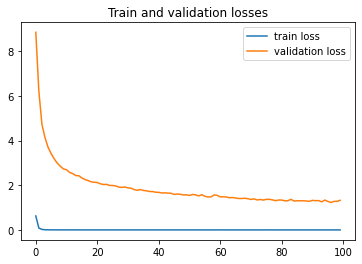

In [61]:
plt.title('Train and validation losses')
plt.plot(range(len(train_loss)), train_loss, label='train loss')
plt.plot(range(len(val_loss)), val_loss, label='validation loss')
plt.legend()
plt.show()

In [62]:
torch.save(model.state_dict(), r'C:\Users\João Ferreira\Desktop\FEUP\2022_2023\1S - 02 - MECD10 - Tópicos Avançados de Aprendizagem Computacional\Projeto_TAAC\Development\model_GOOGL_2000_2022_infered.pt')

In [63]:
test_loss = evaluate(model, val_loader, device=DEVICE)
print(f'Test loss = {test_loss:.3f}')

loss = 8.560: 100%|██████████| 17/17 [00:00<00:00, 361.60it/s]

Test loss = 1.324


In [64]:
def predict(model, data_loader, **kwargs):
    num_steps = kwargs.get('num_steps', 24)
    device = kwargs.get('device', torch.device('cpu'))
    
    model.eval()
    preds = []
    pbar = tqdm(enumerate(data_loader), total=len(data_loader))
    for i, batch in pbar:
        ## YOUR CODE HERE ##
        batch['inputs'] = batch['inputs'].to(device)
        with torch.no_grad():
            preds_i = model(batch['inputs'], num_steps).cpu()
        preds.extend([pred for pred in preds_i])
        ## *** ##
    return preds

In [65]:
test_preds = predict(model, test_loader, num_steps=TARGET_WIDTH, device=DEVICE)

100%|██████████| 9/9 [00:00<00:00, 562.48it/s]


132


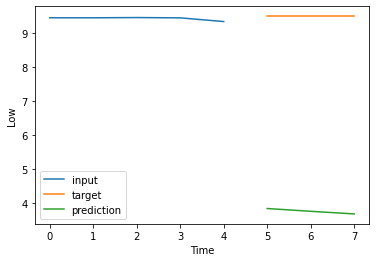

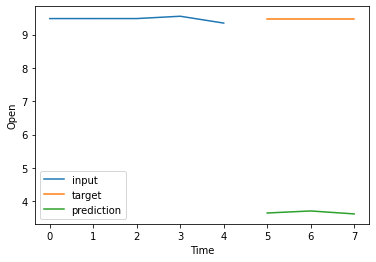

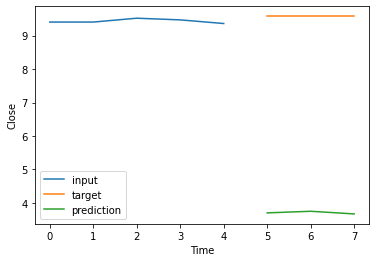

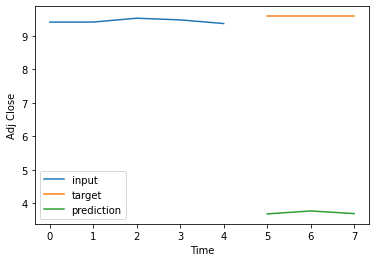

In [66]:
idx = random.randint(0, len(test_data))
print(len(test_data))
inputs = test_data[idx]['inputs'].numpy()
targets = test_data[idx]['targets'].numpy()
preds = test_preds[idx].numpy()

for i in [1, 2, 3, 4]:
    plt.plot(range(INPUT_WIDTH), inputs[:,i], label='input')
    plt.plot(range(INPUT_WIDTH, INPUT_WIDTH + TARGET_WIDTH), targets[:,i], label='target')
    plt.plot(range(INPUT_WIDTH, INPUT_WIDTH + TARGET_WIDTH), preds[:,i], label='prediction')
    plt.ylabel(test_df.columns[i])
    plt.xlabel('Time')
    plt.legend()
    plt.show()

# RNN